<a href="https://colab.research.google.com/github/Kiogora/DSP-using-MATLAB-Python/blob/main/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We install Octave which is MATLAB con=mpatible based on their common Fortran roots. Python is already installed on Colab as well as the Scientific computing tools.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datatypes

## Column vector

This is an (N × 1) matrix or a vertical arrangement
of numbers. It is denoted by the vector symbol, that is, lowercase bold
typeface like

## Row vector 

This is a (1 × M) matrix or a horizontal arrangement of
numbers. It is also denoted by the vector symbol

## General matrix 

This is the most general case of an (N × M) matrix
and is denoted by the matrix symbol

In [ ]:
a = 3                          #a = [3]is a scalar,
x = np.array([1,2,3])          #x = [1,2,3] is a row vector,
y = np.array([[1],[2],[3]])    #y = [1;2;3] is a column vector, and
A = np.array([[1,2,3],[4,5,6]]) #A = [1,2,3;4,5,6] is a matrix 

# Matrix operations

## Matrix addition and subtraction

These are straightforward operations that are also used for array addition and subtraction. Care must be taken that the two matrix operands be exactly the same size.

## Matrix conjugation

This operation is meaningful only for complexvalued matrices. It produces a matrix in which all imaginary parts are
negated. It is denoted by A∗ in analysis and by conj(A) in MATLAB

## Multiplication by a scalar

This is a simple straightforward operation in which each element of a matrix is scaled by a constant,

## Vector-vector multiplication
In this operation, one has to be careful about matrix dimensions to avoid invalid results. The operation produces either a scalar or a matrix. Let x be an (N × 1) and y be a (1 × M) vectors results in an (1 × M) matrix

## Matrix-vector multiplication
If the matrix and the vector are compatible (i.e., the number of matrix-columns is equal to the vector-rows), then this operation produces a column vector

## Array operations

### Array multiplication
This is an element by element multiplication
operation. For it to be a valid operation, both arrays must be the same
size. Thus we have:

x.*y -> 1D array

X.*Y -> 2D array





In [ ]:
A = np.array([[1,1],[2,2]])
c_complex = np.eye(2) + 1j #[[1,0][0,1]] + j
rowVec = np.array([1,2,3])
colVec = np.array([[1],[2],[3]])
B = np.array([[1,1],[2,2]])

print(f"Matrix A:\n {A}\n")
print(f"Matrix B:\n {B}\n")
print(f"Complex matrix C:\n {c_complex}\n")
print(f"Matrix A + B:\n {A+B}\n")
print(f"Matrix A - B:\n {A-B}\n")
print(f"Complex matrix C conjugate:\n {np.conjugate(c_complex)}\n")
print(f"Matrix A transposition:\n {A.T}\n")
print(f"Matrix A multiplication by scalar 3:\n {A*3}\n")
print(f"Row vector D:\n {rowVec}\n")
print(f"Column vector E:\n {colVec}\n")
#Use of the caret in numpy can be confused for an xor operation
print(f"Array exponentiation D^D:\n {np.power(rowVec,3)}\n")
print(f"Vector matrix multiplication D*E:\n {np.matmul(rowVec, colVec)}\n")
print(f"Row vector D scaling by scalar 3:\n {rowVec*3}\n")
print(f"Column vector E scaling by scalar 3:\n {colVec*3}\n")
print(f"Matrix multiplication of A*B:\n {np.matmul(B,A)}\n")
print(f"Element-wise multiplication of A*B:\n {A*B}\n")

Matrix A:
 [[1 1]
 [2 2]]

Matrix B:
 [[1 1]
 [2 2]]

Complex matrix C:
 [[1.+1.j 0.+1.j]
 [0.+1.j 1.+1.j]]

Matrix A + B:
 [[2 2]
 [4 4]]

Matrix A - B:
 [[0 0]
 [0 0]]

Complex matrix C conjugate:
 [[1.-1.j 0.-1.j]
 [0.-1.j 1.-1.j]]

Matrix A transposition:
 [[1 2]
 [1 2]]

Matrix A multiplication by scalar 3:
 [[3 3]
 [6 6]]

Row vector D:
 [1 2 3]

Column vector E:
 [[1]
 [2]
 [3]]

Array exponentiation D^D:
 [ 1  8 27]

Vector matrix multiplication D*E:
 [14]

Row vector D scaling by scalar 3:
 [3 6 9]

Column vector E scaling by scalar 3:
 [[3]
 [6]
 [9]]

Matrix multiplication of A*B:
 [[3 3]
 [6 6]]

Element-wise multiplication of A*B:
 [[1 1]
 [4 4]]



# Implement functions

From the book:

$$x(n) =  sin(2\pi n)$$

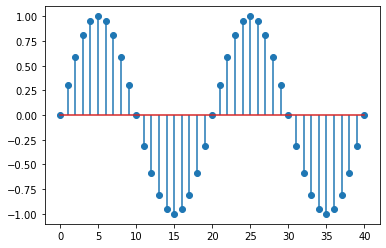

In [ ]:
n = np.arange(0,41,1); # sample index from 0 to 20
x = np.sin(0.1*np.pi*n); # Evaluate sin(0.2 pi n)
Hs = plt.stem(n,x, use_line_collection=True); # Stem-plot with handle Hs

# Applications

Echo generation

In [58]:
import requests

def download_file(url):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                # If you have chunk encoded response uncomment if
                # and set chunk_size parameter to None.
                #if chunk: 
                f.write(chunk)
    return local_filename

In [66]:
import IPython.display as ipd
from scipy.signal import lfilter
from scipy.io.wavfile import read

# Load pink panther wav file
#Play original sound
file=download_file('https://www2.cs.uic.edu/~i101/SoundFiles/PinkPanther60.wav')
fs, data = read(file)
ipd.Audio(data=data,rate=fs)

In [82]:
alpha = 0.9; D = fs//2;        # Echo parameters. Delay by 0.5 seconds
b = np.concatenate((1,np.zeros(D),alpha), axis=None)
x = lfilter(b,1,data);        # Generate sound plus its echo
ipd.Audio(data=x.astype(int),rate=fs);    #Play sound with echo